# Импорт всех нужных библиотек

In [133]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Описание данных

In [134]:
#Смотрю на таблицу, которую создала в файле с парсером

df = pd.read_csv('data.csv')
df.head()

,Название,Ближайшее метро,"Расстояние до центра, км","Цена за квадратный метр, руб",Количество комнат,Этаж,Количество этажей в доме,"Площадь квартиры, м^2","Жилая площадь, м^2","Площадь кухни, м^2","Цена, руб"
0,"Продажа 3-комнатной квартиры 130м², 11/22этаж",Ломоносовский проспект,"•до центра 8,8 км",423077₽/м²,3-комнатная,11.0,22.0,130м²,70м²,20м²,55000000
1,"Продажа 4-комнатной квартиры 106м², 3/10этаж",Аминьевская,"•до центра 11,2 км",646226₽/м²,4-комнатная,3.0,10.0,NaN,NaN,NaN,68500000
2,"Продажа многокомнатной квартиры 136,9м², 8/14этаж",Минская,"•до центра 8,8 км",745069₽/м²,5-комнатная,8.0,14.0,"136,9м²","72,7м²",12м²,102000000
3,"Продажа 2-комнатной квартиры 75м², 7/10этаж",Аминьевская,"•до центра 11,2 км",440000₽/м²,2-комнатная,7.0,10.0,75м²,35м²,21м²,33000000
4,"Продажа 3-комнатной квартиры 118м², 9/18этаж",Раменки,"•до центра 9,7 км",507627₽/м²,3-комнатная,9.0,18.0,118м²,75м²,20м²,59900000


In [135]:
# Смотрю к каким типам данных сейчас относятся все переменные а также размер датасета

df.dtypes, df.shape

(Название                         object
 Ближайшее метро                  object
 Расстояние до центра, км         object
 Цена за квадратный метр, руб     object
 Количество комнат                object
 Этаж                            float64
 Количество этажей в доме        float64
 Площадь квартиры, м^2            object
 Жилая площадь, м^2               object
 Площадь кухни, м^2               object
 Цена, руб                         int64
 dtype: object,
 (3624, 11))

**Описание всего датасета:**

В моем датасете хранится информация об актуальных на 13 мая 2024 года объявлениях о продаже квартир в районе Раменки города Москва с сайта m2.ru. Ссылка на страницу, с которой собирались данные: https://m2.ru/moskva/nedvizhimost/kupit-kvartiru/rayon-ramenki/ 

В таблице имеется 3624 квартиры, в столбцах есть название объявления, 1 категориальный признак - ближайшее метро, 8 количественных признаков и зависимая переменная - цена квартиры в рублях.

**Описание переменных:**
    
- **Название** - это название объявления о продаже квартиры, не отношу его к признакам для оценивания модели (тип данных object)
- **Ближайшее метро** - переменная, в которой содержатся названия ближайших к квартирам метро, категориальный признак (тип данных object)
- **Расстояние до центра, км** - переменная, в которой содержатся значения расстояния от квартир до центра в километрах, количественный признак (тип данных object, это не ок, для визуализаций и построения модели нужно перевести данные в float)
- **Цена за квадратный метр, руб** - переменная, в которой содержатся значения цен за квадратный метр для каждой квартиры, количественный признак (тип данных object, это не ок, для визуализаций и построения модели нужно перевести данные в int)
- **Количество комнат** - переменная, в которой содержатся значения количества комнат для каждой квартиры, количественный признак (тип данных object, это не ок, для визуализаций и построения модели нужно перевести данные в int)
- **Этаж** - переменная, в которой содержатся значения этажей, на которых находятся квартиры, количественный признак (тип данных float, можно привести в int для эстетики)
- **Количество этажей в доме** - переменная, в которой содержатся значения количества этажей в доме, в котором находится квартира, количественный признак (тип данных float, можно привести в int для эстетики)
- **Площадь квартиры, м^2** - переменная, в которой содержатся значения площадей всех квартир в квадратных метрах, количественный признак (тип данных object, это не ок, для визуализаций и построения модели нужно перевести данные в float)
- **Жилая площадь, м^2** - переменная, в которой содержатся значения жилых площадей всех квартир в квадратных метрах, количественный признак (тип данных object, это не ок, для визуализаций и построения модели нужно перевести данные в float)
- **Площадь кухни, м^2** - переменная, в которой содержатся значения площадей кухонь всех квартир в квадратных метрах, количественный признак (тип данных object, это не ок, для визуализаций и построения модели нужно перевести данные в float)
- **Цена, руб** - переменная, в которой содержатся цены всех квартир в рублях, количественная будущая зависимая переменная (тип данных int)

# Предварительная обработка данных

Проверяю наличие пропусков в данных, вижу, что у многих квартир много пропусков в некоторых признаках (примерно 1/3), удаляю данные квартиры, так как заменять признаки на среднее или медиану странно, ведь их слишком много. 
Можно было попробовать достать эти признаки из названия объявления, но проблема в том, что формат записи названий везде разный, непонятно, как это осуществить.

In [136]:
print(df.isnull().sum())
df = df.dropna()
print(df.shape)
df.head()

Название                           0
Ближайшее метро                    1
Расстояние до центра, км           0
Цена за квадратный метр, руб       0
Количество комнат               1129
Этаж                            1244
Количество этажей в доме        1244
Площадь квартиры, м^2           1726
Жилая площадь, м^2              1726
Площадь кухни, м^2              1726
Цена, руб                          0
dtype: int64
(1668, 11)


,Название,Ближайшее метро,"Расстояние до центра, км","Цена за квадратный метр, руб",Количество комнат,Этаж,Количество этажей в доме,"Площадь квартиры, м^2","Жилая площадь, м^2","Площадь кухни, м^2","Цена, руб"
0,"Продажа 3-комнатной квартиры 130м², 11/22этаж",Ломоносовский проспект,"•до центра 8,8 км",423077₽/м²,3-комнатная,11.0,22.0,130м²,70м²,20м²,55000000
2,"Продажа многокомнатной квартиры 136,9м², 8/14этаж",Минская,"•до центра 8,8 км",745069₽/м²,5-комнатная,8.0,14.0,"136,9м²","72,7м²",12м²,102000000
3,"Продажа 2-комнатной квартиры 75м², 7/10этаж",Аминьевская,"•до центра 11,2 км",440000₽/м²,2-комнатная,7.0,10.0,75м²,35м²,21м²,33000000
4,"Продажа 3-комнатной квартиры 118м², 9/18этаж",Раменки,"•до центра 9,7 км",507627₽/м²,3-комнатная,9.0,18.0,118м²,75м²,20м²,59900000
5,"Продажа 3-комнатной квартиры 117,2м², 7/18этаж",Раменки,"•до центра 9,7 км",580205₽/м²,3-комнатная,7.0,18.0,"117,2м²","58,6м²","16,8м²",68000000


После очистки пропусков в датафрейме осталось 1668 наблюдений, этого достаточно для дальнейшего исследования.

При парсинге заметила, что у некоторых квартир в количество комнат ошибочно записывается тип размещения (апартаменты), удалю строки с данными квартирами из датафрейма, осталось 1666 наблюдений.

In [137]:
df[df['Количество комнат'] == 'апартаменты']
df = df.drop(index=[827, 2771])

Обрабатываю все признаки, у которых формат object, а должен быть float или int, также для красоты преобразую признаки этаж и количество этажей в доме в int.

In [138]:
dist_to_centre = []
price_metr = []
rooms = []
square = []
live_square = []
kitchen_square = []

for i in df['Расстояние до центра, км']:
    dist_to_centre.append(float(i[11:-3].replace(',','.')))

for i in df['Цена за квадратный метр, руб']:
    price_metr.append(int(i[:-4]))
    
for i in df['Площадь квартиры, м^2']:
    square.append(float(i[:-2].replace(',','.')))
    
for i in df['Жилая площадь, м^2']:
    live_square.append(float(i[:-2].replace(',','.')))   

for i in df['Площадь кухни, м^2']:
    kitchen_square.append(float(i[:-2].replace(',','.')))  

for i in df['Количество комнат']:
    rooms.append(int(i[:-10]))
    
df['Расстояние до центра, км'] = dist_to_centre
df['Цена за квадратный метр, руб'] = price_metr
df['Площадь квартиры, м^2'] = square
df['Жилая площадь, м^2'] = live_square
df['Площадь кухни, м^2'] = kitchen_square
df['Количество комнат'] = rooms
df['Этаж'] = df['Этаж'].astype(int)
df['Количество этажей в доме'] = df['Количество этажей в доме'].astype(int)
print(df.shape)
df.head()

(1666, 11)


,Название,Ближайшее метро,"Расстояние до центра, км","Цена за квадратный метр, руб",Количество комнат,Этаж,Количество этажей в доме,"Площадь квартиры, м^2","Жилая площадь, м^2","Площадь кухни, м^2","Цена, руб"
0,"Продажа 3-комнатной квартиры 130м², 11/22этаж",Ломоносовский проспект,8.8,423077,3,11,22,130.0,70.0,20.0,55000000
2,"Продажа многокомнатной квартиры 136,9м², 8/14этаж",Минская,8.8,745069,5,8,14,136.9,72.7,12.0,102000000
3,"Продажа 2-комнатной квартиры 75м², 7/10этаж",Аминьевская,11.2,440000,2,7,10,75.0,35.0,21.0,33000000
4,"Продажа 3-комнатной квартиры 118м², 9/18этаж",Раменки,9.7,507627,3,9,18,118.0,75.0,20.0,59900000
5,"Продажа 3-комнатной квартиры 117,2м², 7/18этаж",Раменки,9.7,580205,3,7,18,117.2,58.6,16.8,68000000


Получила итоговый датафрейм со всеми обработанными признаками в нужных типах.

In [139]:
df.dtypes

Название                         object
Ближайшее метро                  object
Расстояние до центра, км        float64
Цена за квадратный метр, руб      int64
Количество комнат                 int64
Этаж                              int64
Количество этажей в доме          int64
Площадь квартиры, м^2           float64
Жилая площадь, м^2              float64
Площадь кухни, м^2              float64
Цена, руб                         int64
dtype: object

# Визуализация

Решила посмотреть на то, как меняется цена на квартиры в зависимости от ближайшего метро. Хочу выдвинуть такую гипотезу: "В среднем цена на квартиры, которые находятся около метро "Ломоносовский проспект" выше, чем у остальных метро". Еще по этому графику видно, что в данных много выбросов.

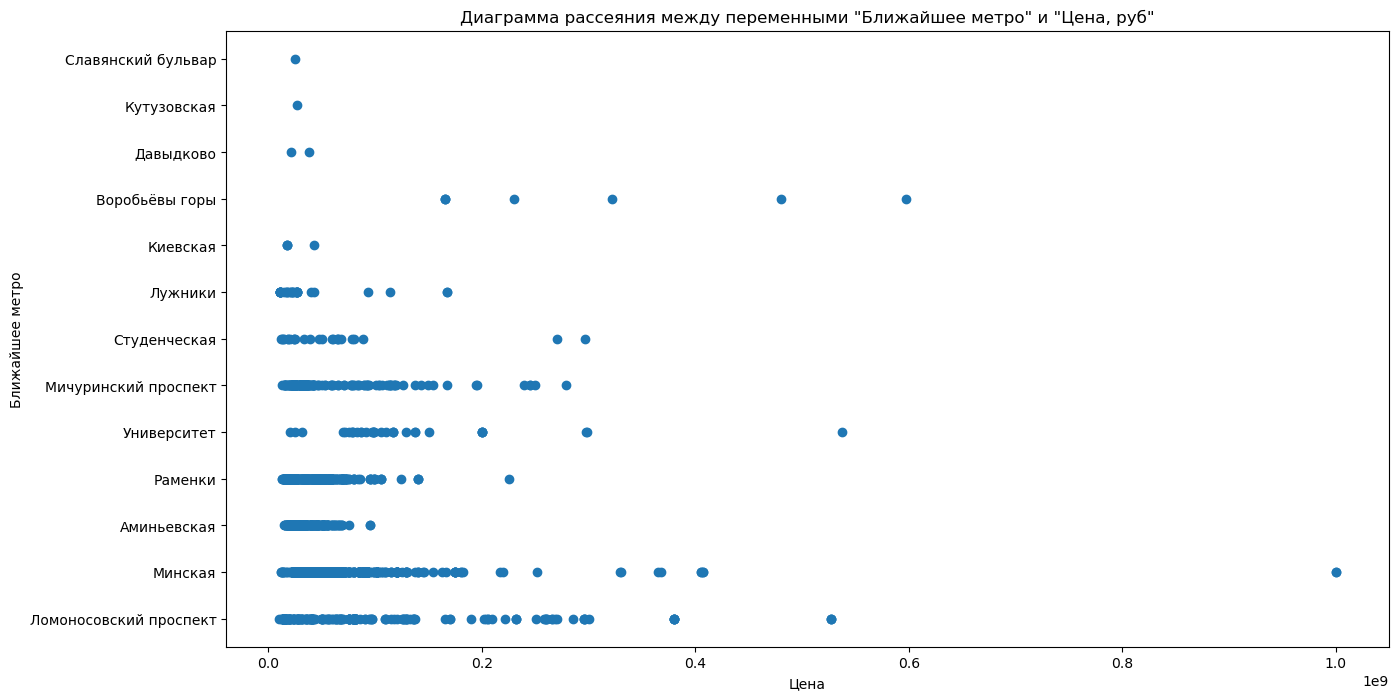

In [140]:
plt.figure(figsize = (15,8))
plt.scatter(df['Цена, руб'], df['Ближайшее метро']);
plt.xlabel('Цена');
plt.ylabel('Ближайшее метро');
plt.title('Диаграмма рассеяния между переменными "Ближайшее метро" и "Цена, руб"');

Решила отразить распределение будущей зависимой переменной на графике boxplot, чтобы посмотреть насколько много выбросов. Их оказывается очень много... Почистим данные от них, удалю из выборки все наблюдения, у которых цена выше 3 квартиля.

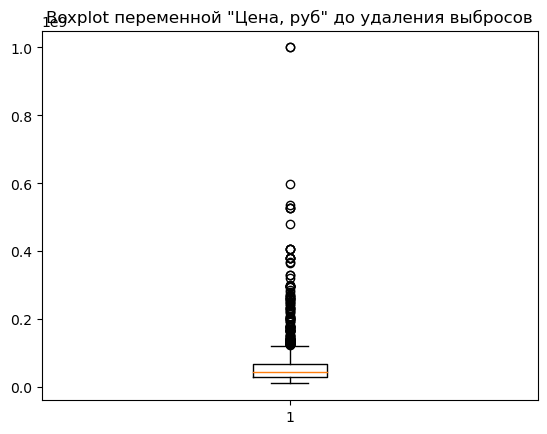

In [152]:
plt.boxplot(df['Цена, руб']);
plt.title('Boxplot переменной "Цена, руб" до удаления выбросов');

Почистила выбросы и на графике еще раз проверила, что их нет и все супер. 

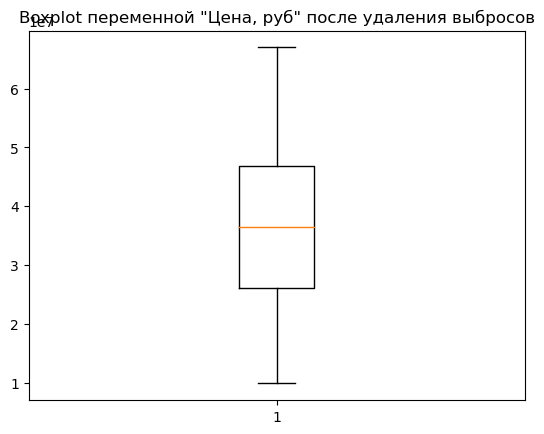

In [153]:
df2 = df[df['Цена, руб'] < np.quantile(df['Цена, руб'], 0.75)]
plt.boxplot(df2['Цена, руб']);
plt.title('Boxplot переменной "Цена, руб" после удаления выбросов');

Решила еще проверить переменную "Цена за квадратный метр, руб". Ее тоже можно взять в качестве зависимой переменной, в ней как раз должно быть меньше выбросов. Проверим это через boxplot. Выбросов, действительно, меньше, но не намного.

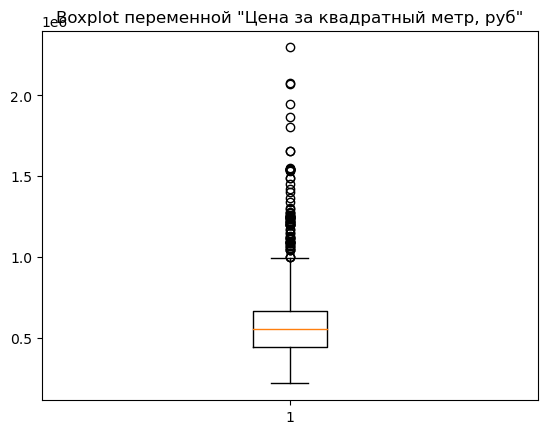

In [155]:
plt.boxplot(df['Цена за квадратный метр, руб']);
plt.title('Boxplot переменной "Цена за квадратный метр, руб"');

Также захотела посмотреть на то, какое ближайшее метро является самым частым в моих данных. По картинке можно увидеть, что это Минская.

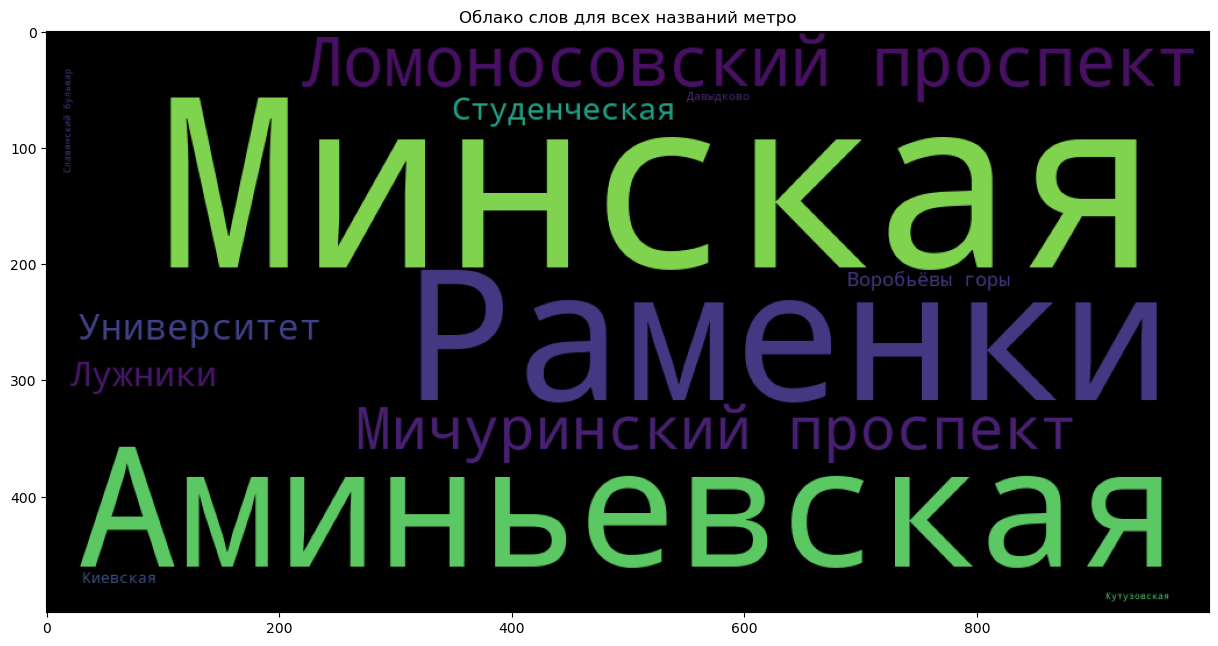

In [144]:
df_sum = df['Ближайшее метро'].value_counts().to_frame()
df_to_dict = dict(df_sum['Ближайшее метро'])

wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(df_to_dict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud);
plt.title('Облако слов для всех названий метро');

# Создание новых признаков

Многие люди не хотят жить на первом и последнем этажах в доме, добавлю два бинарных признака: "Первый этаж" и "Последний этаж", и заполню их следующим образом: если квартира находится на первом или последнем этаже, то соответствующий признак будет принимать значение 1, если нет, то 0. Как раз проверим, как данные признаки влияют на стоимость квартиры. 

К сожалению, наблюдений с квартирами, находящимися на последнем этаже не оказалось в моей выборке, так что признак можно удалить.

In [145]:
df['Первый этаж'] = np.where(df['Этаж'] == 1, 1, 0)
df['Последний этаж'] = np.where(df['Этаж'] == df['Количество этажей в доме'], 1, 0)
df = df.drop('Последний этаж', axis = 1)
df.head()

,Название,Ближайшее метро,"Расстояние до центра, км","Цена за квадратный метр, руб",Количество комнат,Этаж,Количество этажей в доме,"Площадь квартиры, м^2","Жилая площадь, м^2","Площадь кухни, м^2","Цена, руб",Первый этаж
0,"Продажа 3-комнатной квартиры 130м², 11/22этаж",Ломоносовский проспект,8.8,423077,3,11,22,130.0,70.0,20.0,55000000,0
2,"Продажа многокомнатной квартиры 136,9м², 8/14этаж",Минская,8.8,745069,5,8,14,136.9,72.7,12.0,102000000,0
3,"Продажа 2-комнатной квартиры 75м², 7/10этаж",Аминьевская,11.2,440000,2,7,10,75.0,35.0,21.0,33000000,0
4,"Продажа 3-комнатной квартиры 118м², 9/18этаж",Раменки,9.7,507627,3,9,18,118.0,75.0,20.0,59900000,0
5,"Продажа 3-комнатной квартиры 117,2м², 7/18этаж",Раменки,9.7,580205,3,7,18,117.2,58.6,16.8,68000000,0


# Машинное обучение

Закодируем категориальную переменную "Ближайшее метро" методом OHE. Появилось 12 новых признаков.

In [146]:
df_OHE = pd.get_dummies(data=df, columns=['Ближайшее метро'], dtype=int)
df_OHE.head()

,Название,"Расстояние до центра, км","Цена за квадратный метр, руб",Количество комнат,Этаж,Количество этажей в доме,"Площадь квартиры, м^2","Жилая площадь, м^2","Площадь кухни, м^2","Цена, руб",...,Ближайшее метро_Киевская,Ближайшее метро_Кутузовская,Ближайшее метро_Ломоносовский проспект,Ближайшее метро_Лужники,Ближайшее метро_Минская,Ближайшее метро_Мичуринский проспект,Ближайшее метро_Раменки,Ближайшее метро_Славянский бульвар,Ближайшее метро_Студенческая,Ближайшее метро_Университет
0,"Продажа 3-комнатной квартиры 130м², 11/22этаж",8.8,423077,3,11,22,130.0,70.0,20.0,55000000,...,0,0,1,0,0,0,0,0,0,0
2,"Продажа многокомнатной квартиры 136,9м², 8/14этаж",8.8,745069,5,8,14,136.9,72.7,12.0,102000000,...,0,0,0,0,1,0,0,0,0,0
3,"Продажа 2-комнатной квартиры 75м², 7/10этаж",11.2,440000,2,7,10,75.0,35.0,21.0,33000000,...,0,0,0,0,0,0,0,0,0,0
4,"Продажа 3-комнатной квартиры 118м², 9/18этаж",9.7,507627,3,9,18,118.0,75.0,20.0,59900000,...,0,0,0,0,0,0,1,0,0,0
5,"Продажа 3-комнатной квартиры 117,2м², 7/18этаж",9.7,580205,3,7,18,117.2,58.6,16.8,68000000,...,0,0,0,0,0,0,1,0,0,0


Разделим выборку на обучающую и тестовую.

In [147]:
df_train, df_test = train_test_split(df_OHE, test_size = 0.2)

y_train = df_train['Цена, руб']
y_test = df_test['Цена, руб']

X_train = df_train.drop(['Цена, руб', 'Название'], axis = 1)
X_test = df_test.drop(['Цена, руб', 'Название'], axis = 1)

Буду оценивать линейную регрессию, посмотрю на качество модели при помощи RMSE и R^2.

In [148]:
def rmse(actual, predicted):
    return np.sqrt(np.mean((actual - predicted)**2))
model_regression = LinearRegression()
model_regression.fit(X_train, y_train)

y_test_hat = model_regression.predict(X_test)
y_train_hat = model_regression.predict(X_train)

print("RMSE для линейной регрессии:", rmse(y_test, y_test_hat))
print("R^2 для линейной регрессии:", r2_score(y_test, y_test_hat))

RMSE для линейной регрессии: 30974090.981209178
R^2 для линейной регрессии: 0.8554974647771441


Получили огромное значение RMSE и большое значение R^2... R^2 больше 0.8, а это значит, что модель предсказывает хорошо. Но ошибка огромная, а это значит, что если модель ошибается, то сильно. Попробуем оценить ту же модель только на датасете без выбросов в переменной "Цена, руб". Может быть, ошибка упадет, а качество улучшится.

In [149]:
df_OHE2 = pd.get_dummies(data=df2, columns=['Ближайшее метро'], dtype=int)

df_train, df_test = train_test_split(df_OHE2, test_size = 0.2)

y_train = df_train['Цена, руб']
y_test = df_test['Цена, руб']

X_train = df_train.drop(['Цена, руб', 'Название'], axis = 1)
X_test = df_test.drop(['Цена, руб', 'Название'], axis = 1)

model_regression = LinearRegression()
model_regression.fit(X_train, y_train)

y_test_hat = model_regression.predict(X_test)
y_train_hat = model_regression.predict(X_train)

print("RMSE для линейной регрессии:", rmse(y_test, y_test_hat))
print("R^2 для линейной регрессии:", r2_score(y_test, y_test_hat))

RMSE для линейной регрессии: 2601798.10267562
R^2 для линейной регрессии: 0.9677965725972397


Качество модели по метрике r^2 улучшилось, теперь оно очень близко к 1. А значит, модель почти не ошибается. Ошибка упала больше, чем в 10 раз. Это хорошо и модель предсказывает супер.

Попробую взять зависимой переменной признак "Цена за квадратный метр, руб" и оценить линейную регрессию для него. Беру датасет, в котором не чистила выбросы.

In [150]:
df_train, df_test = train_test_split(df_OHE, test_size = 0.2)

y_train = df_train['Цена за квадратный метр, руб']
y_test = df_test['Цена за квадратный метр, руб']

X_train = df_train.drop(['Цена, руб', 'Название', 'Цена за квадратный метр, руб'], axis = 1)
X_test = df_test.drop(['Цена, руб', 'Название', 'Цена за квадратный метр, руб'], axis = 1)

model_regression = LinearRegression()
model_regression.fit(X_train, y_train)

y_test_hat = model_regression.predict(X_test)
y_train_hat = model_regression.predict(X_train)

print("RMSE для линейной регрессии:", rmse(y_test, y_test_hat))
print("R^2 для линейной регрессии:", r2_score(y_test, y_test_hat))

RMSE для линейной регрессии: 174148.86436671132
R^2 для линейной регрессии: 0.31356299803707843


Ошибка уменьшилась еще в около 10 раз, но r^2 сильно меньше, чем в предыдущей модели, так что лучше все-таки предсказывать значения просто цены.